In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from skimage import io,img_as_float
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import tensorflow as tf
import pandas as pd
import scipy

In [3]:
path= '/content/drive/MyDrive/Image/original'
images = np.array([cv2.resize(cv2.imread(x.path),(224,224)) for x in os.scandir(path)],dtype=float)/255
print(images.shape)

(25, 224, 224, 3)


In [4]:
from skimage.util import random_noise
noise_images =  [np.array(255*random_noise(x, mode='s&p',amount=0.3), dtype = 'uint8') for x in images]

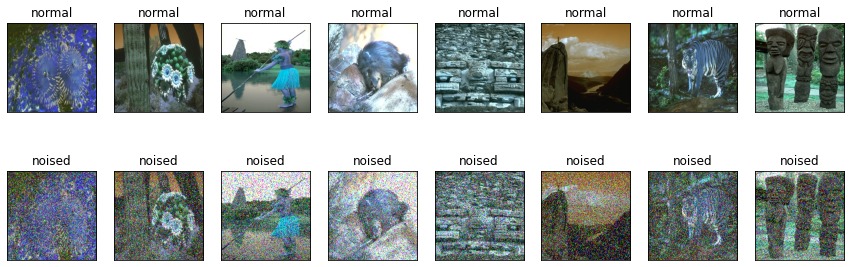

In [5]:
def plot_image_grid(set_1,set_2,label_1,label_2):
  fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(15,5))
  for i in range(8):
      axes[0, i].set_title(label_1)
      axes[0, i].tick_params(bottom = False, left = False, right = False, top = False, labelleft = False ,
                  labelbottom = False)
      axes[0, i].imshow(set_1[i])
      axes[1, i].set_title(label_2)
      axes[1, i].tick_params(bottom = False, left = False, right = False, top = False, labelleft = False ,
                  labelbottom = False)
      axes[1, i].imshow(set_2[i])
  plt.show()
plot_image_grid(images,noise_images,'normal','noised')

similarity checking

In [6]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

def get_mse(source, target):
  return mean_squared_error(source, target)

def get_ssmi(source, target):
  score, diff = ssim(source, target, multichannel=True, full=True)
  return score



mean **filter**

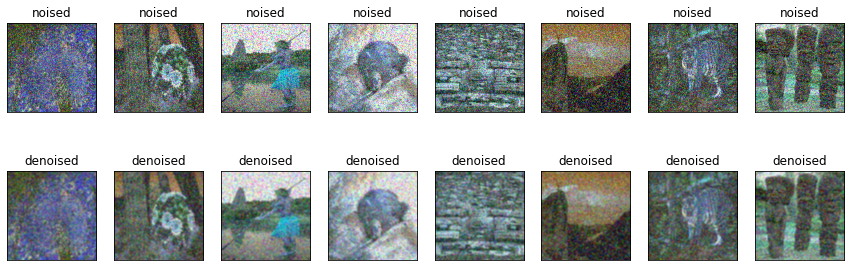

In [7]:
denoised_images = [cv2.blur(img, (5,5)) for img in noise_images]
plot_image_grid(noise_images,denoised_images,'noised','denoised')

similarity measuring

In [8]:
mse = get_mse(noise_images[0],denoised_images[0])
ssmi = get_ssmi(noise_images[0],denoised_images[0])

In [9]:
print('MSE : ',mse)
print('SSMI : ',ssmi)

MSE :  5448.417676445578
SSMI :  0.0899536389787474


median filter

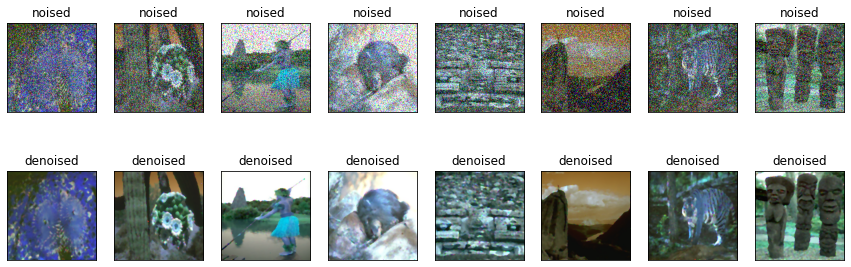

In [10]:
denoised_images = [cv2.medianBlur(img, 5) for img in noise_images]
plot_image_grid(noise_images,denoised_images,'noised','denoised')


similarity after median 

In [11]:
mse = get_mse(noise_images[0],denoised_images[0])
ssmi = get_ssmi(noise_images[0],denoised_images[0])
print('MSE : ',mse)
print('SSMI : ',ssmi)

MSE :  5884.222051711309
SSMI :  0.06886057171554165


wavelet filter

In [12]:
from skimage.restoration import denoise_wavelet

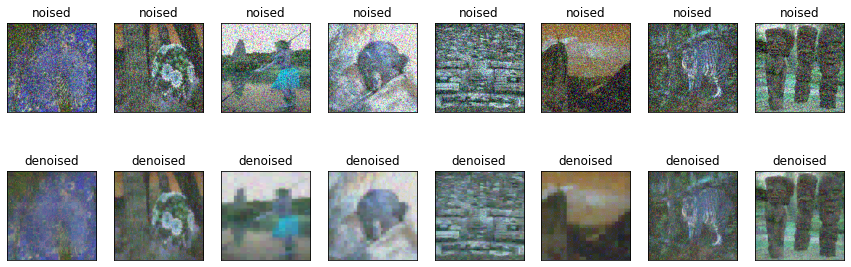

In [13]:
denoised_images = [denoise_wavelet(img, multichannel=True, rescale_sigma=True) for img in noise_images]
plot_image_grid(noise_images,denoised_images,'noised','denoised') 


Similarity after wavelet filter

In [14]:
mse = get_mse(noise_images[0],denoised_images[0])
ssmi = get_ssmi(noise_images[0],denoised_images[0])
print('MSE : ',mse)
print('SSMI : ',ssmi)

MSE :  17054.10069811193
SSMI :  0.00010505320642432238


/usr/local/lib/python3.7/dist-packages/skimage/metrics/_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)
